In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
#Mapping sex and smoker to numerical values
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [7]:
age_range=[13,25,40,55,80]
slots=['Youth','Adult','Elder Adult','Senior Citizen']
df['Age_bracket']=pd.cut(df['age'],bins=age_range,labels=slots)
df.head(15)

,age,sex,bmi,children,smoker,region,charges,Age_bracket
0,19,1,27.900,0,1,southwest,16884.92400,Youth
1,18,0,33.770,1,0,southeast,1725.55230,Youth
2,28,0,33.000,3,0,southeast,4449.46200,Adult
3,33,0,22.705,0,0,northwest,21984.47061,Adult
4,32,0,28.880,0,0,northwest,3866.85520,Adult
5,31,1,25.740,0,0,southeast,3756.62160,Adult
6,46,1,33.440,1,0,southeast,8240.58960,Elder Adult
7,37,1,27.740,3,0,northwest,7281.50560,Adult
8,37,0,29.830,2,0,northeast,6406.41070,Adult
9,60,1,25.840,0,0,northwest,28923.13692,Senior Citizen


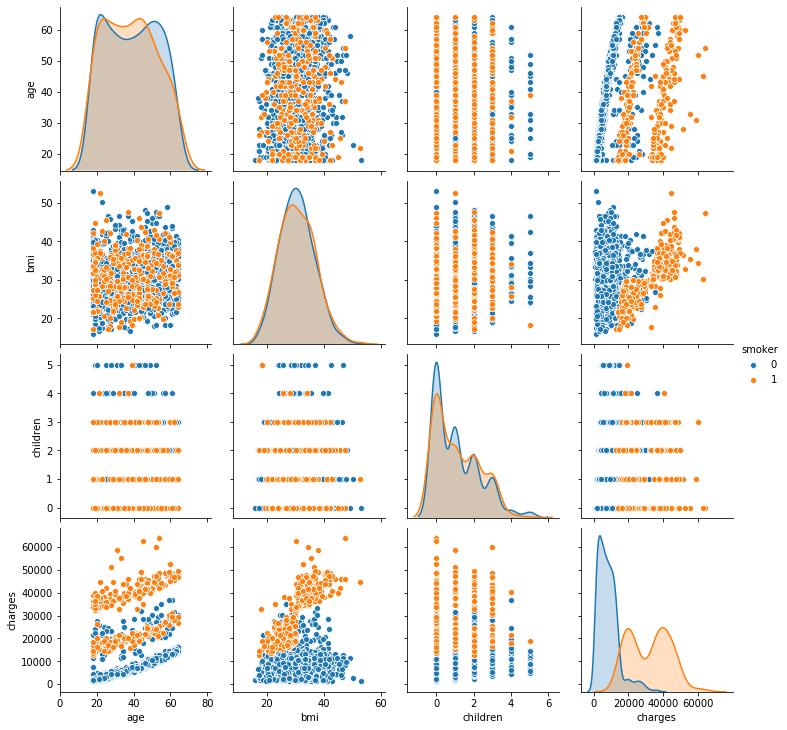

In [10]:
sns.pairplot(df, vars=["age", 'bmi','children','charges'],hue='smoker')

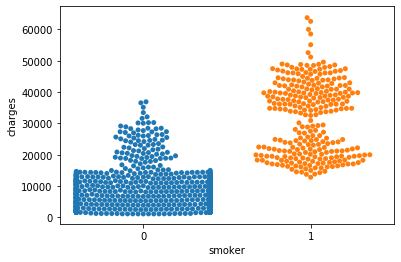

In [12]:
sns.swarmplot(x='smoker',y='charges',data=df)

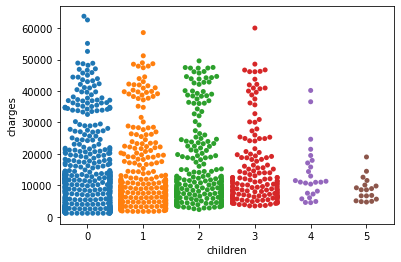

In [13]:
sns.swarmplot(x='children',y='charges',data=df)

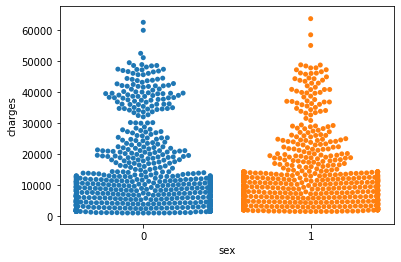

In [14]:
sns.swarmplot(x='sex',y='charges',data=df)

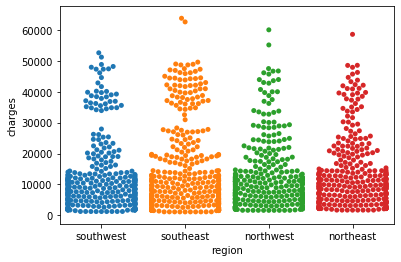

In [15]:
sns.swarmplot(x='region',y='charges',data=df)

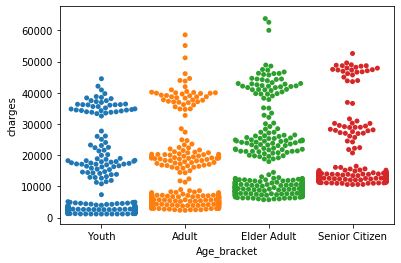

In [16]:
sns.swarmplot(x='Age_bracket',y='charges',data=df)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler(feature_range=(0,1))
columnsToScale=['bmi','age','children','smoker']
df[columnsToScale]=scaler.fit_transform(df[columnsToScale])
df.head(10)

,age,sex,bmi,children,smoker,region,charges,Age_bracket
0,0.021739,1,0.321227,0.0,1.0,southwest,16884.92400,Youth
1,0.000000,0,0.479150,0.2,0.0,southeast,1725.55230,Youth
2,0.217391,0,0.458434,0.6,0.0,southeast,4449.46200,Adult
3,0.326087,0,0.181464,0.0,0.0,northwest,21984.47061,Adult
4,0.304348,0,0.347592,0.0,0.0,northwest,3866.85520,Adult
5,0.282609,1,0.263115,0.0,0.0,southeast,3756.62160,Adult
6,0.608696,1,0.470272,0.2,0.0,southeast,8240.58960,Elder Adult
7,0.413043,1,0.316922,0.6,0.0,northwest,7281.50560,Adult
8,0.413043,0,0.373150,0.4,0.0,northeast,6406.41070,Adult
9,0.913043,1,0.265806,0.0,0.0,northwest,28923.13692,Senior Citizen


In [27]:
df['region']=df['region'].map({'southeast':1.0,'southwest':0.6,'northeast':0.8,'northwest':0.8})

In [28]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges,Age_bracket
0,0.021739,1,0.321227,0.0,1.0,0.6,16884.92400,Youth
1,0.000000,0,0.479150,0.2,0.0,1.0,1725.55230,Youth
2,0.217391,0,0.458434,0.6,0.0,1.0,4449.46200,Adult
3,0.326087,0,0.181464,0.0,0.0,0.8,21984.47061,Adult
4,0.304348,0,0.347592,0.0,0.0,0.8,3866.85520,Adult
5,0.282609,1,0.263115,0.0,0.0,1.0,3756.62160,Adult
6,0.608696,1,0.470272,0.2,0.0,1.0,8240.58960,Elder Adult
7,0.413043,1,0.316922,0.6,0.0,0.8,7281.50560,Adult
8,0.413043,0,0.373150,0.4,0.0,0.8,6406.41070,Adult
9,0.913043,1,0.265806,0.0,0.0,0.8,28923.13692,Senior Citizen


In [30]:
X=df[['age','sex','bmi','children','smoker','region']]
y=df['charges']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression

In [41]:
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [53]:
for i in range(len(pred)):
    print(y_test.iloc[i],pred[i])

Actual Predicted
9095.06825 8502.690121304611
5272.1758 6898.246999652398
29330.98315 36804.45447385498
9301.89355 9523.17038047713
33750.2918 26836.497220264766
4536.259 11261.705766934572
2117.33885 -58.09081649151858
14210.53595 16998.223347288287
3732.6251 555.1698198869249
10264.4421 11291.559448410395
18259.216 28524.8960762712
7256.7231 9398.414164641343
3947.4131 5333.133531681016
46151.1245 38663.55362302578
48673.5588 40556.04204336677
44202.6536 37355.30396438119
9800.8882 15371.03139453892
42969.8527 36016.05019103482
8233.0975 9271.100444387803
21774.32215 31305.08049244668
5080.096 4293.165322510329
7441.501 10613.595478277539
1256.299 2730.0692102588637
2755.02095 6497.311033067577
11085.5868 11227.016192063036
10923.9332 12499.654125815676
12644.589 14899.154711482966
18804.7524 5964.742021299364
9715.841 9501.971095318311
1131.5066 2340.0660529430925
15828.821730000001 9454.90919534088
11842.62375 12999.960337689115
2020.5523 4567.914577775703
5693.4305 3263.1390216217

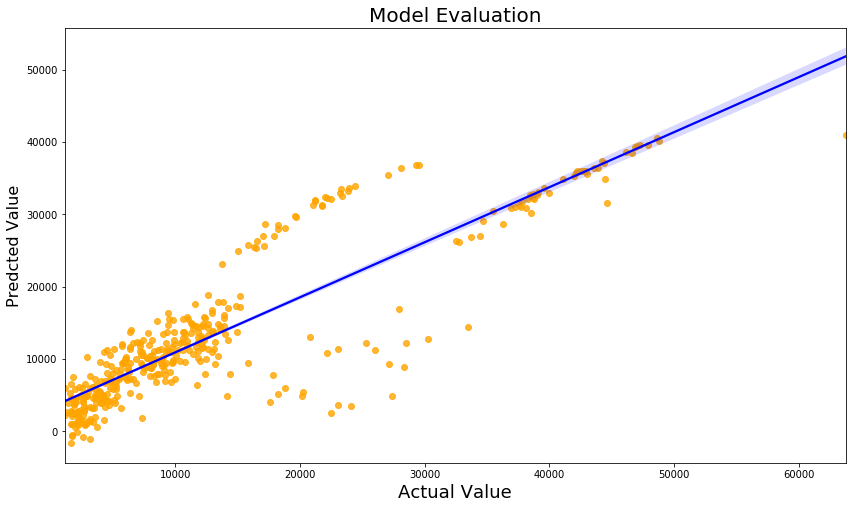

In [59]:
plt.figure(figsize=(14,8))
sns.regplot(x=y_test, y=pred, ci=68, fit_reg=True,scatter_kws={"color": "orange"}, line_kws={"color": "blue"})

plt.title('Model Evaluation', fontsize=20)              # Plot heading 
plt.xlabel('Actual Value', fontsize=18)                          # X-label
plt.ylabel('Predcted Value', fontsize=16)                          # Y-label
plt.show()